# Applied Computational Statistics (ACS)

## SW4

Submit your answers <b>individually</b>.

Make sure to follow all the prescribed naming conventions set in the code below.

Instructions:

1. You may use `sklearn.linear_model.LinearRegression`.


2. You may use `scipy.stats.t`.


2. You may NOT use `statsmodels`. I use this to check your answers.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from scipy.stats import t

atol = 1e-06
rtol = 1e-05

---

### Linear Regression t-Test 

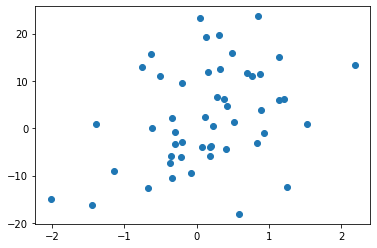

In [19]:
# set seed
np.random.seed(1)

# hyperparameters
n = 50

# true parameters (we don't know this!)
mu, sigma = 0, 10
b0 = 2
b1 = 5

# generate data
e = np.random.normal(loc=mu, scale=sigma, size=(n, 1))
x = np.random.normal(loc=0, scale=1, size=(n, 1))
y = b0 + b1*x + e

plt.scatter(x, y)
plt.show()

#### Q1.

Calculate the OLS estimates for the simple linear regression model,

\begin{align*}
    y = \beta_0 + \beta_1 x + \varepsilon
\end{align*}

using the data provided.

In [20]:
model = LinearRegression().fit(x.reshape(-1, 1), y) # must reshape x before fitting
resid = y - model.predict(x.reshape(-1, 1)) # must compute residuals manually
b1_hat = model.coef_[0]
b0_hat = model.intercept_
print('beta1_hat = ', b1_hat[0])
print('beta0_hat = ', b0_hat[0])
# print('sigma_hat = ', np.std(resid))

beta1_hat =  4.720508590717466
beta0_hat =  1.7858474741607697


In [21]:
# Hidden Test

In [22]:
# Hidden Test

The <b>t-statistic</b> is defined as,

\begin{align*}
    \frac{\hat{\theta} - \theta_0}{\mathbf{\text{s.e.}}(\hat{\theta})}
\end{align*}

In the context of linear regression, $\hat{\theta}$ is our parameter estimate, $\theta_0$ is the null hypothesis being tested, and $\mathbf{\text{s.e.}}(\hat{\theta})$ is the <b>standard error</b> of $\hat{\theta}$. 

Recall that the standard error is the standard deviation of the sampling distribution of a statistic.

For this hypothesis test, we wish to know if there is a significant linear relationship between the independent variable $X$ and the dependent variable $Y$. The null hypothesis is that there is no relationship,

\begin{align*}
    H_0 &: \hat{\theta} = 0\\ 
    H_1 &: \hat{\theta} \neq 0
\end{align*}

In [23]:
### bootstrap attempt

# n = x.shape[0]
# sim_size = 100_000

# beta1_hat_vec = []
# beta0_hat_vec = []
# sigma_hat_vec = []

# for i in range(sim_size):
#     idx = np.random.choice(range(n), size=n, replace=True)
#     x_boot = x[idx].reshape(-1,1)
#     y_boot = y[idx]
    
#     model = LinearRegression().fit(x_boot,y_boot)
#     resid = y - model.predict(x)
    
#     beta1_hat_vec.append(model.coef_[0])
#     beta0_hat_vec.append(model.intercept_)
#     sigma_hat_vec.append(np.std(resid))
    
# SE_b1 = np.std(np.array(beta1_hat_vec)) 
# SE_b0 = np.std(np.array(beta0_hat_vec))

In [24]:
# b1_hat_tstat = (b1_hat - 0) / SE_b1
# b0_hat_tstat = (b0_hat - 0) / SE_b0

#### Q2.

Calculate the t-statistics for both the slope $\hat{\beta}_1$ and intercept $\hat{\beta}_0$.

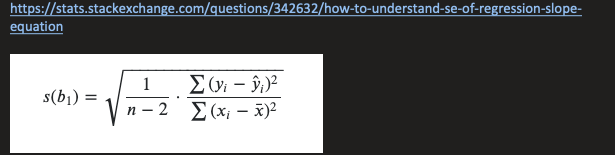

In [25]:
### analytical

SE_b1 = np.sqrt((1/(n-2))*((np.sum(resid**2))/(np.sum((x-x.mean())**2))))
print(f'SE b1 = {SE_b1}')

b1_t = (b1_hat / SE_b1)[0]
print(f'T stat for b1 = {b1_t}')

SE b1 = 1.7883591510796912
T stat for b1 = 2.639575270922253


alternatively...
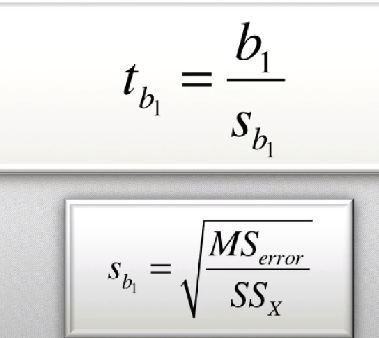

In [26]:
sserror = np.sum(resid**2)
mserror = sserror / (n-2)
ssx = np.sum((x-np.mean(x))**2)
se_b1 = np.sqrt((mserror/ssx))
print(f'SE b1 = {se_b1}')

b1_hat_tstat = (b1_hat / se_b1)[0]
print(f'T stat for b1 = {b1_hat_tstat}')

SE b1 = 1.7883591510796912
T stat for b1 = 2.639575270922253


calculating T stat of b0 (intercept)
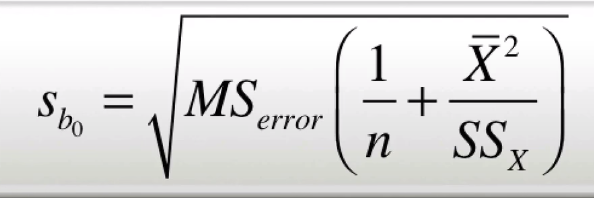

In [27]:
b0_hat_tstat = (b0_hat / np.sqrt(mserror*((1/n)+((np.mean(x)**2)/ssx))))[0]
print(f't stat b0 = {b0_hat_tstat}')

t stat b0 = 1.2545435190173864


In [28]:
print(b0_hat_tstat)
print(b1_hat_tstat)

1.2545435190173864
2.639575270922253


In [29]:
# Unhidden Test
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

assert np.isclose(b1_hat_tstat, results.tvalues[1])

In [30]:
# Unhidden Test
assert np.isclose(b0_hat_tstat, results.tvalues[0])

The t-statistic follows the [`Student's t-distribution`](https://en.wikipedia.org/wiki/Student%27s_t-distribution). This distribution has a single parameter: $\nu$ degrees of freedom. For linear regression,

\begin{align*}
    \frac{\hat{\theta} - \theta_0}{\mathbf{\text{s.e.}}(\hat{\theta})} \sim t(\nu = n - p - 1)
\end{align*}

where $p$ is the number of features or independent variables. Since we are using a simple linear regression, $p=1$.

#### Q3.

Calculate the p-values for the t-statistics of $\hat{\beta}_1$ and $\hat{\beta}_0$.

In [31]:
p = 1
df = n - p - 1

b0_hat_pvalue = t.sf(b0_hat_tstat, df=df) * 2
b1_hat_pvalue = t.sf(b1_hat_tstat, df=df) * 2

In [32]:

print(b1_hat_pvalue)
print(b0_hat_pvalue)

0.011162888194067248
0.21571911746538658


In [33]:
# Unhidden Test
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

assert np.isclose(b1_hat_pvalue, results.pvalues[1])

In [34]:
# Unhidden Test
assert np.isclose(b0_hat_pvalue, results.pvalues[0])